In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_pickle('../data/train.pickle')

In [2]:
x = data['features']
y = data['labels']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
model = LogisticRegression(max_iter = 20000)
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

Переформируем данные в плоские массивы (1 строка, 32*32*3 столбов на 1 дорожный знак)

In [3]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/home/andrej/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


([<matplotlib.axis.YTick at 0x7f0d32e217d0>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10'),
  Text(0, 11, '11'),
  Text(0, 12, '12'),
  Text(0, 13, '13'),
  Text(0, 14, '14'),
  Text(0, 15, '15'),
  Text(0, 16, '16'),
  Text(0, 17, '17'),
  Text(0, 18, '18'),
  Text(0, 19, '19'),
  Text(0, 20, '20'),
  Text(0, 21, '21'),
  Text(0, 22, '22'),
  Text(0, 23, '23'),
  Text(0, 24, '24'),
  Text(0, 25, '25'),
  Text(0, 26, '26'),
  Text(0, 27, '27'),
  Text(0, 28, '28'),
  Text(0, 29, '29'),
  Text(0, 30, '30'),
  Text(0, 31, '31'),
  Text(0, 32, '32'),
  Text(0, 33, '33'),
  Text(0, 34, '34'),
  Text(0, 35, '35'),
  Text(0, 36, '36'),
  Text(0, 37, '37'),
  Text(0, 38, '38'),
  Text(0, 39, '39'),
  Text(0, 40, '40'),
  Text(0, 41, '41'),
  Text(0, 42, '42')])

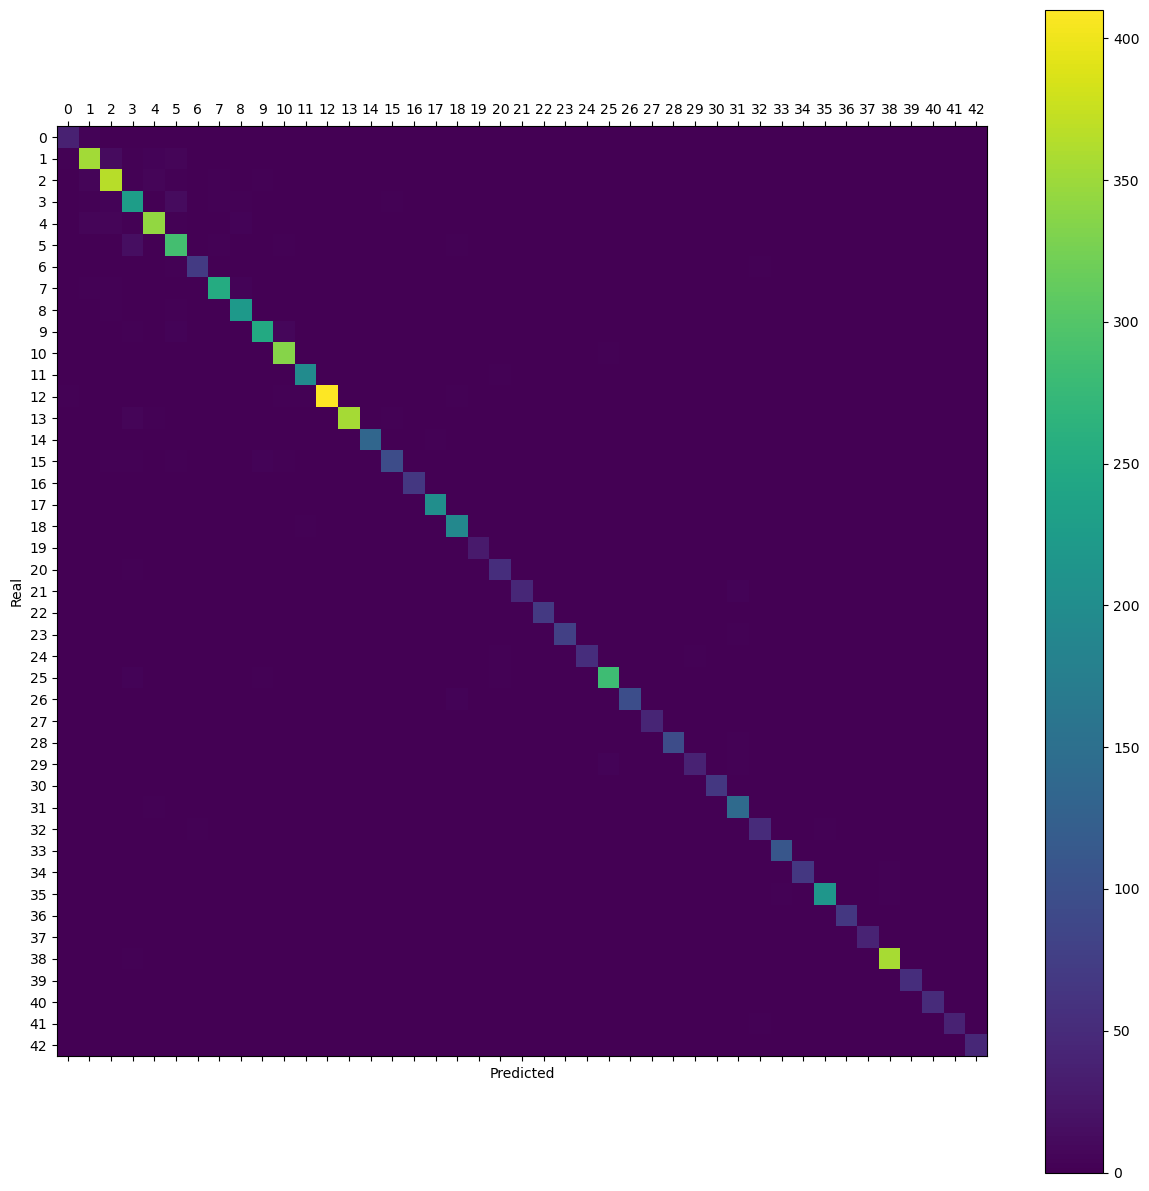

In [4]:
confusion_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
plt.matshow(confusion_m, fignum = 1)
plt.colorbar()
plt.xlabel("Predicted")
plt.xticks(np.arange(0,43)) 
plt.xticks(np.arange(0,43))
plt.ylabel("Real")
plt.yticks(np.arange(0,43)) 

In [5]:
names = pd.read_csv('../data/label_names.csv').SignName
worst_number = 0
worst_sign = ""
for i in range(43):
    if np.sum(confusion_m[i]) - confusion_m[i][i] > worst_number:
        worst_number = np.sum(confusion_m[i]) - confusion_m[i][i]
        worst_sign = names[i]
    print(f'{names[i]} - ошибок допущено {np.sum(confusion_m[i]) - confusion_m[i][i]}')

Speed limit (20km/h) - ошибок допущено 7
Speed limit (30km/h) - ошибок допущено 33
Speed limit (50km/h) - ошибок допущено 23
Speed limit (60km/h) - ошибок допущено 27
Speed limit (70km/h) - ошибок допущено 21
Speed limit (80km/h) - ошибок допущено 32
End of speed limit (80km/h) - ошибок допущено 4
Speed limit (100km/h) - ошибок допущено 12
Speed limit (120km/h) - ошибок допущено 11
No passing - ошибок допущено 18
No passing for vehicles over 3.5 metric tons - ошибок допущено 5
Right-of-way at the next intersection - ошибок допущено 8
Priority road - ошибок допущено 12
Yield - ошибок допущено 13
Stop - ошибок допущено 2
No vehicles - ошибок допущено 16
Vehicles over 3.5 metric tons prohibited - ошибок допущено 0
No entry - ошибок допущено 3
General caution - ошибок допущено 5
Dangerous curve to the left - ошибок допущено 0
Dangerous curve to the right - ошибок допущено 10
Double curve - ошибок допущено 9
Bumpy road - ошибок допущено 0
Slippery road - ошибок допущено 8
Road narrows on th

Больше всего ошибок для Speed limit (60km/h) - 41 штук. Вероятная причина - знаки скоростного ограничения похожи между собой, модель путает числа, но знак с числом от знака "Поворот направо" она отличить может.

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.91      0.95      0.93       372
           2       0.94      0.91      0.93       401
           3       0.89      0.83      0.86       275
           4       0.94      0.94      0.94       365
           5       0.90      0.87      0.89       330
           6       0.95      0.93      0.94        75
           7       0.95      0.94      0.95       267
           8       0.95      0.93      0.94       240
           9       0.93      0.95      0.94       261
          10       0.99      0.95      0.97       353
          11       0.96      0.95      0.95       209
          12       0.97      1.00      0.98       412
          13       0.96      0.99      0.98       358
          14       0.99      0.99      0.99       137
          15       0.86      0.93      0.89       102
          16       1.00      0.99      0.99        68
          17       0.99    

Weighted avg не очень подходит, так как она учтет с малым весом ошибки для редковстречающихся знаков. Классы у нас не сильно сбалансированы (можно увидеть по цветам), а знаки принципиально разные - если мы будем угадывать большую часть распространенных знаков и ошибаться во всех редких, физическая точность модели будет так себе. Имеет смысл смотреть на macro avg.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier()
model_neighbors.fit(x_train, y_train)
neighbors_pred = model_neighbors.predict(x_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)
mnb_pred = model_mnb.predict(x_test)

In [9]:
from sklearn.svm import SVC
model_svm_lin = SVC(kernel='linear', max_iter=20000)
model_svm_lin.fit(x_train, y_train)
svm_lin_pred = model_svm_lin.predict(x_test)

model_svm_poly = SVC(kernel='poly', max_iter=20000)
model_svm_poly.fit(x_train,y_train)
svm_poly_pred = model_svm_poly.predict(x_test)

model_svm_rbf = SVC(kernel='rbf', max_iter=20000)
model_svm_rbf.fit(x_train,y_train)
svm_rbf_pred = model_svm_rbf.predict(x_test)

/home/andrej/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [10]:
from sklearn.metrics import precision_score
print(precision_score(neighbors_pred, y_test, average = 'macro'))
print(precision_score(mnb_pred, y_test, average = 'macro'))
print(precision_score(svm_lin_pred, y_test, average = 'macro'))
print(precision_score(svm_poly_pred, y_test, average = 'macro'))
print(precision_score(svm_rbf_pred, y_test, average = 'macro'))

0.8666182380858297
0.35009907128588336
0.9525309878004042
0.6913148319710285
0.8331045882648987


Хорошо отработала линейная SVM, плохо отработала байесовская классификация. НБК рассматривает признаки как независимые величины, у нас признаки (вроде как) пиксели изображения, которые тяжело считать таковыми. SVM в нашем случае схожа с линейной регрессией. 